In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [2]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

In [3]:
graph_name = [
    'ecology1'
    , 'nlpkkt160'
    , 'nlpkkt240'
    , 'G3_circuit'
    , 'NLR'
    , 'asia'
    , 'cage15'
    , 'coPapersCiteseer'
    , 'coPapersDBLP'
    , 'kkt_power'
    , 'uk-2002'
]
graph_list = [
    'input/ecology1'
    , 'input/nlpkkt160'
    , 'input/nlpkkt240'
    , 'input/G3'
    , 'input/NLR'
    , 'input/asia'
    , 'nput/cage15'
    , 'input/coPapersCiteseer'
    , 'input/coPapersDBLP'
    , 'input/kkt'
    , 'input/uk-2002'
]

In [101]:
SpMV_p2p = pd.read_csv('CSR_SpMV_on_MPI.csv')
SpMV_comm = pd.read_csv('CSR_Comm_on_MPI.csv')
SpMV_local_mult = pd.read_csv('CSR_Local_Matmul_on_MPI.csv')
SpMV_p2p = SpMV_p2p.groupby('Name').mean()
SpMV_p2p = SpMV_p2p.reset_index()
SpMV_comm = SpMV_comm.groupby('Name').mean()
SpMV_comm = SpMV_comm.reset_index()
SpMV_local_mult = SpMV_local_mult.groupby('Name').mean()
SpMV_local_mult = SpMV_local_mult.reset_index()

for index,row in SpMV_p2p.iterrows():
    print(row['Name'], ' compare: ', row['AvgTime']/(SpMV_comm.iloc[index]['AvgTime'] + SpMV_local_mult.iloc[index]['AvgTime']))

input/G3  compare:  1.2145395026754802
input/NLR  compare:  1.2646697034734657
input/asia  compare:  1.3583664303875027
input/cage15  compare:  0.9395484183492463
input/coPapersCiteseer  compare:  0.8445226725535221
input/coPapersDBLP  compare:  0.906738375640548
input/ecology1  compare:  1.2143197708195603
input/kkt  compare:  1.0100794842637362
input/nlpkkt160  compare:  0.962366553628679
input/nlpkkt240  compare:  1.0960659930685248
input/thermal2  compare:  1.023719165085389
input/uk-2002  compare:  0.9464036140014247


In [102]:
SpMV_comm

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
0,input/G3,1585478,12697,0.344529,0.347529,0.346176,100,128,3.0,49345,124.484,5.094,8,47322,616,1237803,10539
1,input/NLR,4163763,33402,0.745250,0.748188,0.746812,100,128,6.0,200418,127.773,5.406,8,193582,1488,3383592,33394
2,input/asia,11950757,95360,0.493375,0.495812,0.494688,100,128,2.0,240251,4.141,4.156,8,189120,12,11014530,93705
3,input/cage15,5154859,41482,9.692882,9.713765,9.704059,100,128,34.0,1435555,1357.195,37.312,8,602278,67195,5110871,41066
4,input/coPapersCiteseer,434102,3493,3.143687,3.150063,3.147563,100,128,260.0,908341,36.453,122.328,8,262434,28816,433661,3490
5,input/coPapersDBLP,540486,4349,5.066187,5.075688,5.070875,100,128,128.0,543489,85.578,126.875,8,188288,28750,540472,4346
6,input/ecology1,1000000,7850,0.229529,0.232353,0.230882,100,128,4.0,31400,70.234,5.312,8,30846,414,734402,281
7,input/kkt,2063494,16605,1.636059,1.644059,1.641412,100,128,6.0,114851,196.688,18.516,8,93508,6820,1950323,12959
8,input/nlpkkt160,8345600,67159,4.878647,4.886647,4.882941,100,128,27.0,1813293,1503.312,10.469,8,1589682,73572,7500388,3758
9,input/nlpkkt240,27993600,225271,13.103294,13.114059,13.109235,100,128,27.0,6082317,3256.828,10.750,8,5714858,222010,24435823,7922


In [103]:
SpMV_local_mult

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
0,input/G3,1585478,12697,0.43120,0.43360,0.432500,100,128,3.0,49345,124.484,5.094,8,47322,616,1237803,10539
1,input/NLR,4163763,33402,2.34450,2.34740,2.345800,100,128,6.0,200418,127.773,5.406,8,193582,1488,3383592,33394
2,input/asia,11950757,95360,4.37260,4.37540,4.374200,100,128,2.0,240251,4.141,4.156,8,189120,12,11014530,93705
3,input/cage15,5154859,41482,9.52380,9.54520,9.534900,100,128,34.0,1435555,1357.195,37.312,8,602278,67195,5110871,41066
4,input/coPapersCiteseer,434102,3493,4.86630,4.87300,4.870300,100,128,260.0,908341,36.453,122.328,8,262434,28816,433661,3490
5,input/coPapersDBLP,540486,4349,2.64040,2.65070,2.645500,100,128,128.0,543489,85.578,126.875,8,188288,28750,540472,4346
6,input/ecology1,1000000,7850,0.25670,0.26020,0.258500,100,128,4.0,31400,70.234,5.312,8,30846,414,734402,281
7,input/kkt,2063494,16605,1.06380,1.07220,1.069200,100,128,6.0,114851,196.688,18.516,8,93508,6820,1950323,12959
8,input/nlpkkt160,8345600,67159,11.41075,11.41875,11.414938,100,128,27.0,1813293,1503.312,10.469,8,1589682,73572,7500388,3758
9,input/nlpkkt240,27993600,225271,41.96890,41.98010,41.975100,100,128,27.0,6082317,3256.828,10.750,8,5714858,222010,24435823,7922


,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
2,input/asia,11950757,95360,0.493375,0.495812,0.494688,100,128,2.0,240251,4.141,4.156,8,189120,12,11014530,93705
4,input/coPapersCiteseer,434102,3493,3.143687,3.150063,3.147563,100,128,260.0,908341,36.453,122.328,8,262434,28816,433661,3490
6,input/ecology1,1000000,7850,0.229529,0.232353,0.230882,100,128,4.0,31400,70.234,5.312,8,30846,414,734402,281
10,input/thermal2,1227087,9847,0.240000,0.242000,0.241000,100,128,6.0,59024,74.641,5.000,8,56486,603,1023979,9772
5,input/coPapersDBLP,540486,4349,5.066187,5.075688,5.070875,100,128,128.0,543489,85.578,126.875,8,188288,28750,540472,4346
0,input/G3,1585478,12697,0.344529,0.347529,0.346176,100,128,3.0,49345,124.484,5.094,8,47322,616,1237803,10539
1,input/NLR,4163763,33402,0.745250,0.748188,0.746812,100,128,6.0,200418,127.773,5.406,8,193582,1488,3383592,33394
7,input/kkt,2063494,16605,1.636059,1.644059,1.641412,100,128,6.0,114851,196.688,18.516,8,93508,6820,1950323,12959
11,input/uk-2002,18520486,149039,15.439706,15.469059,15.453941,100,128,66.0,9545229,273.852,124.031,8,9520000,25229,18519040,148946
3,input/cage15,5154859,41482,9.692882,9.713765,9.704059,100,128,34.0,1435555,1357.195,37.312,8,602278,67195,5110871,41066


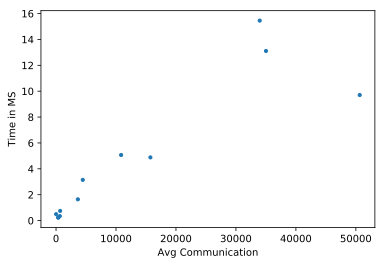

In [80]:
plt.scatter(SpMV_comm['AvgCommunication']*SpMV_comm['AvgInterProcessCall'], SpMV_comm['AvgTime'], s=10)
plt.xlabel('Avg Communication')
plt.ylabel('Time in MS')
SpMV_comm = SpMV_comm.sort_values(by=['AvgCommunication', 'NonZeroPerBlock', 'NonZeroPerRow'])
SpMV_comm

# Linear Model of SpMV Baseed on Non Zero Per Row and Block

Mean squared error: 2.36
R²: 0.99
intercept:  [1.04332244]
Coef:  [[-8.93869257e-03  6.12370465e-06]]
Linear Equation: y =  1.0433224432739046  +  -0.008938692566575673  * x


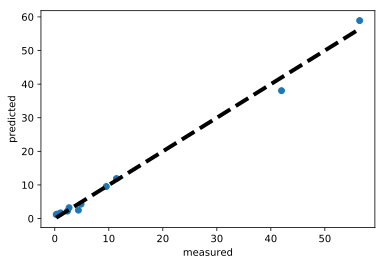

In [84]:
pdf = matplotlib.backends.backend_pdf.PdfPages("Non_Zero_Per_Row_and_Block_vs_Local_Matmul.pdf")
SpMV_local_mult = SpMV_local_mult.sort_values(by=['NonZeroPerBlock', 'NonZeroPerRow'])
y_test = SpMV_local_mult[['AvgTime']]
reg = LinearRegression()
reg.fit(SpMV_local_mult[['NonZeroPerRow','NonZeroPerBlock']], SpMV_local_mult[['AvgTime']])
y_predicted = reg.predict(SpMV_local_mult[['NonZeroPerRow','NonZeroPerBlock']])
print("Mean squared error: %.2f" % mean_squared_error(SpMV_local_mult[['AvgTime']], y_predicted))
print('R²: %.2f' % r2_score(SpMV_local_mult[['AvgTime']], y_predicted))
print('intercept: ', reg.intercept_)
print('Coef: ', reg.coef_)
print('Linear Equation: y = ', reg.intercept_[0], ' + ',  reg.coef_[0][0], ' * x')
fig, ax = plt.subplots()
ax.scatter(SpMV_local_mult[['AvgTime']], y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
# plt.show()
pdf.savefig(bbox_inches = 'tight')
pdf.close()

Mean squared error: 1.52
R²: 0.94
intercept:  [-2.27635383]
Coef:  [[ 1.10406625e-02  8.23198746e-02  3.82907073e-07 -1.41168089e-04]]
Linear Equation of comm: y =  -2.2763538313741254  +  0.011040662510096333  * x


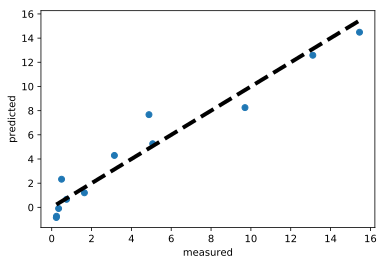

In [86]:
pdf = matplotlib.backends.backend_pdf.PdfPages("AvgCommunication_AvgInterProcessCall_Bandwidth_and_OffDiagonalElem_vs_Global_Matmul.pdf")
SpMV_comm = SpMV_comm.sort_values(by=['AvgCommunication', 'AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem'])
y_test = SpMV_comm[['AvgTime']]
reg_comm = LinearRegression()
reg_comm.fit(SpMV_comm[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']], SpMV_comm[['AvgTime']])
y_predicted = reg_comm.predict(SpMV_comm[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']])
print("Mean squared error: %.2f" % mean_squared_error(SpMV_comm[['AvgTime']], y_predicted))
print('R²: %.2f' % r2_score(SpMV_comm[['AvgTime']], y_predicted))
print('intercept: ', reg_comm.intercept_)
print('Coef: ', reg_comm.coef_)
print('Linear Equation of comm: y = ', reg_comm.intercept_[0], ' + ',  reg_comm.coef_[0][0], ' * x')
fig, ax = plt.subplots()
ax.scatter(SpMV_comm[['AvgTime']], y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
# plt.show()
pdf.savefig(bbox_inches = 'tight')
pdf.close()

# Prediction

In [51]:
SpMV_p2p = pd.read_csv('CSR_SpMV_on_MPI.csv')
SpMV_p2p = SpMV_p2p[SpMV_p2p['Name'] == 'input/thermal2']
SpMV_p2p.head()
y_predicted_local_matmul = reg.predict(SpMV_p2p[['NonZeroPerRow','NonZeroPerBlock']])
y_predicted_comm = reg_comm.predict(SpMV_p2p[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']])
print('Local mat mul: ', y_predicted_local_matmul + y_predicted_comm, ' actual: ', SpMV_p2p['AvgTime'])

Local mat mul:  [[0.46853377]]  actual:  165    1.079
Name: AvgTime, dtype: float64


In [96]:
df_row

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
6,input/ecology1,1000000,7850,0.593000,0.595733,0.594267,100,128,4.0,31400,70.234,5.312,8,30846,414,734402,281
0,input/G3,1585478,12697,0.944067,0.946733,0.945733,100,128,3.0,49345,124.484,5.094,8,47322,616,1237803,10539
10,input/thermal2,1227087,9847,1.078000,1.080000,1.079000,100,128,6.0,59024,74.641,5.000,8,56486,603,1023979,9772
7,input/kkt,2063494,16605,2.732533,2.740733,2.737933,100,128,6.0,114851,196.688,18.516,8,93508,6820,1950323,12959
1,input/NLR,4163763,33402,3.909600,3.912467,3.911133,100,128,6.0,200418,127.773,5.406,8,193582,1488,3383592,33394
2,input/asia,11950757,95360,6.612267,6.614667,6.613733,100,128,2.0,240251,4.141,4.156,8,189120,12,11014530,93705
5,input/coPapersDBLP,540486,4349,6.992467,7.001467,6.996733,100,128,128.0,543489,85.578,126.875,8,188288,28750,540472,4346
4,input/coPapersCiteseer,434102,3493,6.766667,6.773600,6.771267,100,128,260.0,908341,36.453,122.328,8,262434,28816,433661,3490
3,input/cage15,5154859,41482,18.064600,18.085867,18.075933,100,128,34.0,1435555,1357.195,37.312,8,602278,67195,5110871,41066
8,input/nlpkkt160,8345600,67159,15.680200,15.688400,15.684533,100,128,27.0,1813293,1503.312,10.469,8,1589682,73572,7500388,3758


input/ecology1  Local:  1.7246781390523296  Comm:  4.159683139025658
input/G3  Local:  1.8446155729221572  Comm:  4.187816433978898
input/thermal2  Local:  2.1315374971564967  Comm:  4.161968332414009
input/kkt  Local:  2.6006504046570367  Comm:  4.225269380073374
input/M6  Local:  3.4073350101489708  Comm:  4.186272972112803
input/333SP  Local:  3.525699776209042  Comm:  4.171561686105476
input/AS365  Local:  3.5741923186943354  Comm:  4.186382403816622
input/NLR  Local:  3.778621532497014  Comm:  4.189522249245068
input/asia  Local:  5.874046194863694  Comm:  4.125416031476642
input/coPapersDBLP  Local:  16.603138852669993  Comm:  4.167639738263016
input/europe  Local:  21.631316926791918  Comm:  4.132868280127406
input/coPapersCiteseer  Local:  31.561164924309004  Comm:  4.142167699735739
input/cage15  Local:  12.797091793306114  Comm:  4.82863944385899
input/nlpkkt160  Local:  15.09148456744092  Comm:  4.904795786386636
input/nlpkkt200  Local:  26.0026292217566  Comm:  5.3199259190

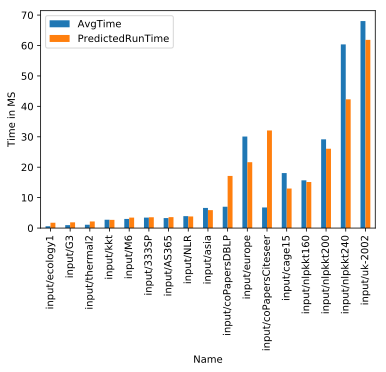

In [104]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_SpMV_based_on_Performance_Model.pdf")
# Linear Equation: y =  4.123269340662652  +  6.479938398441676e-05  * x  +  1.5327471334248416e-11  * x^2
SpMV_p2p = pd.read_csv('CSR_SpMV_on_MPI.csv')
SpMV_p2p_test = pd.read_csv('CSR_SpMV_on_MPI_Test.csv')
SpMVPredictor = pd.concat([SpMV_p2p, SpMV_p2p_test])
SpMVPredictor = SpMVPredictor.groupby('Name').mean()
SpMVPredictor = SpMVPredictor.reset_index()
SpMVPredictor = SpMVPredictor.sort_values(by=['NonZeroPerBlock', 'NonZeroPerRow'])
predictedRuntime = []
error = []
for index,row in SpMVPredictor.iterrows():
    T1 = (5.970439077936305 + (0.7157563117453349*row['NonZeroPerRow']))
    T2 = 1.110570674949308  + ( 5.5240516784695596e-05 * row['MatrixSize']/128)
    T3 = 1.110570674949308  + ( 5.5240516784695596e-05 * 122880)
    T0 = T1/T3*T2
    comm_data = row['AvgCommunication']*row['SizeOfData']
    comm_latency = 4.123269340662652  +  (6.479938398441676e-05  * comm_data) +  (1.5327471334248416e-11 * comm_data * comm_data)

    print(row['Name'], ' Local: ', T0, ' Comm: ', comm_latency)
    predicted_time = T0 + (row['AvgInterProcessCall'] * comm_latency/1000)
    error.append(predicted_time/row['AvgTime'])
    predictedRuntime.append(predicted_time)
    
    
SpMVPredictor['PredictedRunTime'] = predictedRuntime
SpMVPredictor['Error'] = error
ax = SpMVPredictor.plot(kind='bar', x='Name', y=['AvgTime', 'PredictedRunTime'])
ax.set_ylabel('Time in MS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()
SpMVPredictor[['Name', 'AvgCommunication','AvgInterProcessCall', 'MaxRow', 'DiagonalElem', 'OffDiagonalElem', 'NonZeroPerRow','NonZeroPerBlock','AvgTime','PredictedRunTime', 'Error']].to_csv("CSR_SpMV_based_on_Performance_Model.csv")


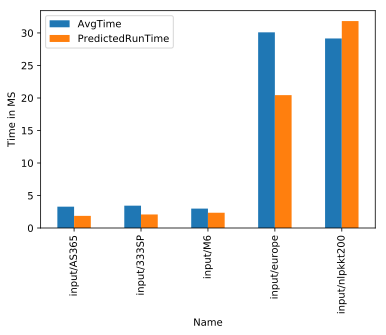

In [77]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_SpMV_based_on_Real_Data.pdf")
SpMV_p2p_test = pd.read_csv('CSR_SpMV_on_MPI_Test.csv')
y_predicted_local_matmul = reg.predict(SpMV_p2p_test[['NonZeroPerRow','NonZeroPerBlock']])
y_predicted_comm = reg_comm.predict(SpMV_p2p_test[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']])
predict = y_predicted_local_matmul + y_predicted_comm
SpMV_p2p_test['PredictedRunTime'] = predict.flatten()
SpMV_p2p_test['Error'] = SpMV_p2p_test['AvgTime']/predict.flatten()
ax = SpMV_p2p_test.plot(kind='bar', x='Name', y=['AvgTime', 'PredictedRunTime'])
ax.set_ylabel('Time in MS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()
SpMV_p2p_test[['Name', 'AvgCommunication','AvgInterProcessCall', 'MaxRow', 'DiagonalElem', 'OffDiagonalElem', 'NonZeroPerRow','NonZeroPerBlock','AvgTime','PredictedRunTime', 'Error']].to_csv("CSR_SpMV_based_on_Real_Data.csv")

In [73]:
from functools import reduce
predict.flatten()

array([1.86681605, 2.08472294])

Mean squared error: 97.98
R²: 0.94
intercept:  [-0.7711219]
Coef:  [[5.12894593e-05 8.21587072e-05]]
Linear Equation: y =  -0.7711218998562455  +  5.128945932690152e-05  * x
length:  19


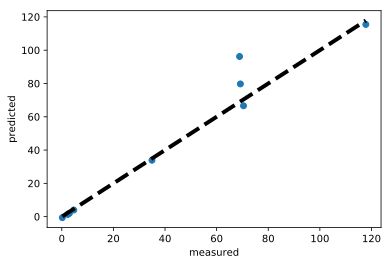

In [124]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_SpMV_on_Random_2D_Partition_Graph.pdf")
SpMV_Bcast_Random_2D_Partition = pd.read_csv('CSR_Random_BrCast_Reduce_SpMV.csv')
SpMV_Bcast_Random_2D_Partition = SpMV_Bcast_Random_2D_Partition.groupby('Name').mean()
SpMV_Bcast_Random_2D_Partition = SpMV_Bcast_Random_2D_Partition.reset_index()
SpMV_Bcast_train = SpMV_Bcast_Random_2D_Partition.iloc[:10,]
SpMV_Bcast = SpMV_Bcast.sort_values(by=['AvgTime'])
SpMV_Bcast = SpMV_Bcast.reset_index()
SpMV_Bcast_test = SpMV_Bcast_Random_2D_Partition.iloc[10:,]
SpMV_Bcast_test = SpMV_Bcast_test.sort_values(by=['AvgTime'])
SpMV_Bcast_test = SpMV_Bcast_test.reset_index()
y_test = SpMV_Bcast_test[['AvgTime']]
ln_reg = LinearRegression()
ln_reg.fit(SpMV_Bcast_train[['MaxRow','NonZeroPerBlock']], SpMV_Bcast_train[['AvgTime']])
y_predicted = ln_reg.predict(SpMV_Bcast_test[['MaxRow','NonZeroPerBlock']])
print("Mean squared error: %.2f" % mean_squared_error(SpMV_Bcast_test[['AvgTime']], y_predicted))
print('R²: %.2f' % r2_score(SpMV_Bcast_test[['AvgTime']], y_predicted))
print('intercept: ', ln_reg.intercept_)
print('Coef: ', ln_reg.coef_)
print('Linear Equation: y = ', ln_reg.intercept_[0], ' + ',  ln_reg.coef_[0][0], ' * x')
fig, ax = plt.subplots()
ax.scatter(SpMV_Bcast_test[['AvgTime']], y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
pdf.savefig(bbox_inches = 'tight')
pdf.close()
SpMV_Bcast_Random_2D_Partition = SpMV_Bcast_Random_2D_Partition.sort_values(by=['AvgTime'])
SpMV_Bcast_Random_2D_Partition = SpMV_Bcast_Random_2D_Partition.reset_index()
SpMV_Bcast_Random_2D_Partition[['Name', 'MatrixSize', 'MaxRow', 'MinTime', 'MaxTime', 'AvgTime', 'TotalRun', 'nProcess', 'NonZeroPerBlock']].to_csv("CSR_SpMV_on_Random_2D_Partition_Graph.csv")
print('length: ', len(SpMV_Bcast_Random_2D_Partition))

In [125]:
y_predicted

array([[ -0.60442969],
       [  1.32199562],
       [  2.02240863],
       [  3.97945815],
       [ 33.89333093],
       [ 96.22131224],
       [ 79.73035476],
       [ 66.59665005],
       [115.47864942]])

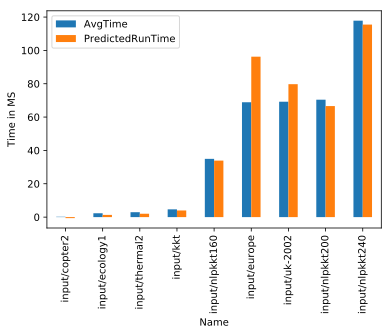

In [128]:
pdf = matplotlib.backends.backend_pdf.PdfPages("SpMV_Prediction_on_Random_2D_Partition_Graph.pdf")
SpMV_Bcast_test['PredictedRunTime'] = y_predicted.flatten()
SpMV_Bcast_test['Error'] = SpMV_Bcast_test['AvgTime']/y_predicted.flatten()
ax = SpMV_Bcast_test.plot(kind='bar', x='Name', y=['AvgTime', 'PredictedRunTime'])
ax.set_ylabel('Time in MS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()
SpMV_Bcast_test[['Name', 'MatrixSize', 'MaxRow', 'MinTime', 'MaxTime', 'AvgTime', 'TotalRun', 'nProcess', 'NonZeroPerBlock','PredictedRunTime', 'Error']].to_csv("SpMV_Prediction_on_Random_2D_Partition_Graph.csv")
SpMV_Bcast_train[['Name', 'MatrixSize', 'MaxRow', 'MinTime', 'MaxTime', 'AvgTime', 'TotalRun', 'nProcess', 'NonZeroPerBlock']].to_csv("SpMV_Train_data_of_Random_2D_Partition_Graph.csv")

In [122]:
SpMV_Bcast_Random_2D_Partition.iloc[:5,]

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock
10,input/copter2,55476,1850,0.208,0.209,0.208,100,900,0.0,874
8,input/coPapersCiteseer,434102,14471,1.780,1.781,1.781,100,900,2.0,37960
9,input/coPapersDBLP,540486,18017,2.087,2.087,2.087,100,900,1.0,35098
11,input/ecology1,1000000,33334,2.307,2.308,2.307,100,900,0.0,4667
17,input/thermal2,1227087,40903,2.940,2.942,2.941,100,900,0.0,8467


In [109]:
SpMV_Bcast = pd.read_csv('CSR_Random_BrCast_Reduce_SpMV.csv')
SpMV_Bcast = SpMV_Bcast.groupby('Name').mean()
SpMV_Bcast = SpMV_Bcast.reset_index()
SpMV_Bcast = SpMV_Bcast.sort_values(by=['MaxRow', 'NonZeroPerBlock'])
# y_test = SpMV_local_mult[['AvgTime']]
# reg = LinearRegression()
# reg.fit(SpMV_local_mult[['NonZeroPerRow','NonZeroPerBlock']], SpMV_local_mult[['AvgTime']])
# y_predicted = reg.predict(SpMV_local_mult[['NonZeroPerRow','NonZeroPerBlock']])
# print("Mean squared error: %.2f" % mean_squared_error(SpMV_local_mult[['AvgTime']], y_predicted))
# print('R²: %.2f' % r2_score(SpMV_local_mult[['AvgTime']], y_predicted))
# print('intercept: ', reg.intercept_)
# print('Coef: ', reg.coef_)
# print('Linear Equation: y = ', reg.intercept_[0], ' + ',  reg.coef_[0][0], ' * x')
# fig, ax = plt.subplots()
# ax.scatter(SpMV_local_mult[['AvgTime']], y_predicted)
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# ax.set_xlabel('measured')
# ax.set_ylabel('predicted')
SpMV_Bcast

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock
10,input/copter2,55476,1850,0.208,0.209,0.208,100,900,0.0,874
8,input/coPapersCiteseer,434102,14471,1.780,1.781,1.781,100,900,2.0,37960
9,input/coPapersDBLP,540486,18017,2.087,2.087,2.087,100,900,1.0,35098
11,input/ecology1,1000000,33334,2.307,2.308,2.307,100,900,0.0,4667
17,input/thermal2,1227087,40903,2.940,2.942,2.941,100,900,0.0,8467
5,input/af,1508065,50269,5.963,5.964,5.964,100,900,1.0,57594
2,input/G3,1585478,52850,3.369,3.370,3.369,100,900,0.0,6991
13,input/kkt,2063494,68784,4.650,4.651,4.651,100,900,0.0,14882
3,input/M6,3501776,116726,7.771,7.771,7.771,100,900,0.0,23844
0,input/333SP,3712815,123761,8.228,8.229,8.228,100,900,0.0,25092


<Figure size 504x432 with 0 Axes>

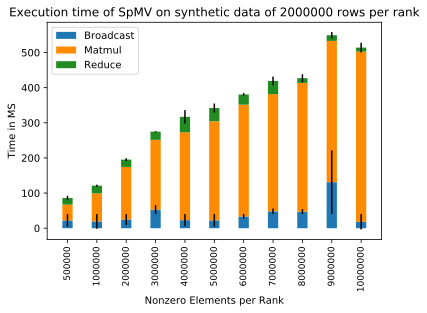

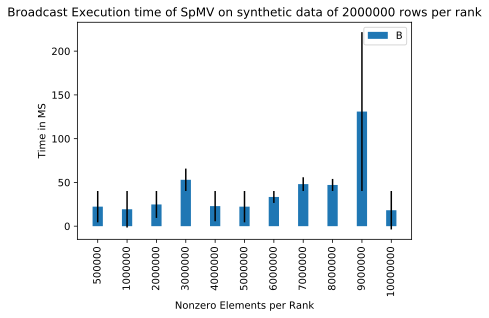

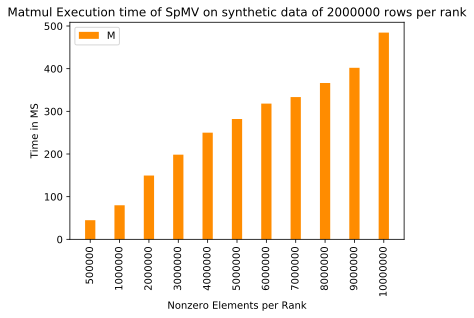

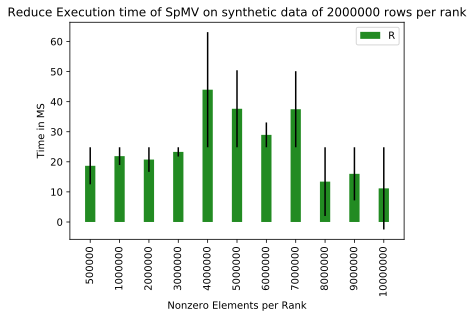

,index,MatrixSize,PartitionRow,MinTime,MaxTime,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock
69,66,3000000,2000000,86.029,86.030,86.029,22.311,44.942,18.671,100,900,0.25,500000
70,64,3000000,2000000,121.175,121.176,121.175,19.324,79.850,21.884,100,900,0.50,1000000
71,58,3000000,2000000,195.562,195.563,195.563,24.816,149.634,20.748,100,900,1.00,2000000
72,59,3000000,2000000,274.815,274.817,274.816,52.989,198.454,23.293,100,900,1.50,3000000
73,60,3000000,2000000,317.618,317.620,317.619,22.913,250.030,43.967,100,900,2.00,4000000
74,61,3000000,2000000,342.264,342.265,342.265,22.299,282.052,37.627,100,900,2.50,5000000
75,62,3000000,2000000,380.617,380.618,380.617,33.379,318.174,28.952,100,900,3.00,6000000
76,63,3000000,2000000,419.838,419.840,419.839,48.064,333.478,37.477,100,900,3.50,7000000
77,65,3000000,2000000,427.074,427.077,427.076,47.083,366.393,13.414,100,900,4.00,8000000
78,67,3000000,2000000,550.173,550.175,550.174,130.957,402.111,16.001,100,900,4.50,9000000


In [59]:
matrixRow = [122880, 500000, 1000000, 2000000]
matRow = matrixRow[3]
pdf = matplotlib.backends.backend_pdf.PdfPages("Stacked_bar_of_SpMV_Broadcast_Matmul_and_Reduce_on_" + str(matRow) + ".pdf")
data = pd.read_csv('CSR_SpMV_Model_of_Random_BrCast_Reduce.csv')
data = data.sort_values(by=['PartitionRow', 'NonZeroPerBlock'])
data = data.reset_index()
data_122880 = data[data['PartitionRow'] == matRow]

N = len(data_122880['AvgBcastTime'])
bcast_time = data_122880['AvgBcastTime'].tolist()
matmul_time = data_122880['AvgMatmulTime'].tolist()
reduce_time = data_122880['AvgReduceTime'].tolist()
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

bcast_std = np.subtract(bcast_time, np.mean(bcast_time))
matmul_std = np.subtract(matmul_time, np.mean(matmul_time))
reduce_std = np.subtract(reduce_time, np.mean(reduce_time))

plt.figure(figsize=(7,6))
f = plt.figure()
p1 = plt.bar(ind, bcast_time, width, yerr=bcast_std)
p2 = plt.bar(ind, matmul_time, width, bottom=bcast_time, color='darkorange')
p3 = plt.bar(ind, reduce_time, width, bottom=list(map(sum, zip(matmul_time, bcast_time))), color='forestgreen', yerr=reduce_std)

plt.xlabel('Nonzero Elements per Rank')
plt.ylabel('Time in MS')
plt.title('Execution time of SpMV on synthetic data of ' + str(matRow) + ' rows per rank')
plt.xticks(ind, data_122880['NonZeroPerBlock'].tolist(), rotation='vertical', fontsize=9)
plt.legend((p1[0], p2[0], p3[0]), ('Broadcast', 'Matmul', 'Reduce'))
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

f = plt.figure()
p1 = plt.bar(ind, bcast_time, width, yerr=bcast_std)
plt.xlabel('Nonzero Elements per Rank')
plt.ylabel('Time in MS')
plt.title('Broadcast Execution time of SpMV on synthetic data of ' + str(matRow) + ' rows per rank')
plt.xticks(ind, data_122880['NonZeroPerBlock'].tolist(), rotation='vertical')
plt.legend("Broadcast")
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

f = plt.figure()
p2 = plt.bar(ind, matmul_time, width, color='darkorange')
plt.xlabel('Nonzero Elements per Rank')
plt.ylabel('Time in MS')
plt.title('Matmul Execution time of SpMV on synthetic data of ' + str(matRow) + ' rows per rank')
plt.xticks(ind, data_122880['NonZeroPerBlock'].tolist(), rotation='vertical')
plt.legend("Matmul")
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

f = plt.figure()
p3 = plt.bar(ind, reduce_time, width, color='forestgreen', yerr=reduce_std)
plt.xlabel('Nonzero Elements per Rank')
plt.ylabel('Time in MS')
plt.title('Reduce Execution time of SpMV on synthetic data of ' + str(matRow) + ' rows per rank')
plt.xticks(ind, data_122880['NonZeroPerBlock'].tolist(), rotation='vertical')
plt.legend("Reduce")
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

pdf.close()

data_122880

In [205]:
matmul_std

array([-5.31566667, -4.42266667, -3.28666667, -2.28966667,  0.76533333,
        1.28033333,  1.65633333,  1.72933333,  1.94733333,  2.26333333,
        2.51533333,  3.15733333])

In [200]:
np.subtract(bcast_time, 1)


array([0.629, 0.527, 0.65 , 0.697, 0.508, 0.553, 0.418, 0.682, 0.603,
       0.51 , 0.639, 0.537])

In [62]:
spmv_2d_data.keys()

Index(['Name', 'MatrixSize', 'AvgRow', 'MinTime', 'MaxTime', 'AvgTime',
       'AvgBcastTime', 'AvgMatmulTime', 'AvgReduceTime', 'TotalRun',
       'nProcess', 'NonZeroPerRow', 'AvgNonZeroPerBlock',
       'MaxNonZeroPerBlock'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

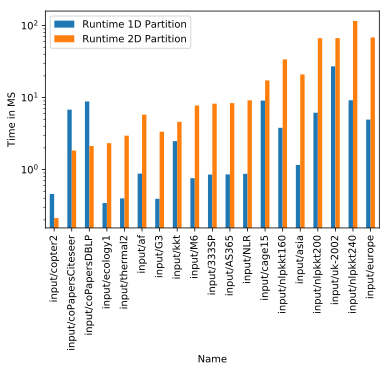

<Figure size 1440x288 with 0 Axes>

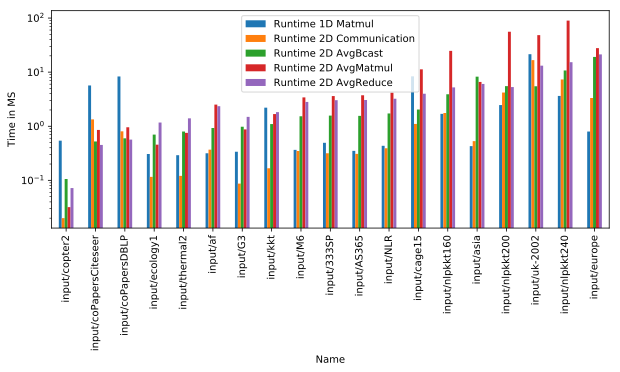

<Figure size 432x288 with 0 Axes>

In [69]:
spmv_2d_data = pd.read_csv('CSR_Random_BrCast_Reduce_SpMV.csv')
spmv_2d_data = spmv_2d_data[spmv_2d_data['nProcess'] == 900]
spmv_2d_data = spmv_2d_data.groupby('Name').mean()
spmv_2d_data = spmv_2d_data.sort_values(by=['AvgRow', 'AvgNonZeroPerBlock'])
spmv_2d_data = spmv_2d_data.reset_index()
spmv_1d_data = pd.read_csv('CSR_SpMV_on_MPI_Test.csv')
spmv_1d_data = spmv_1d_data[spmv_1d_data['nProcess'] == 900]
spmv_1d_data = spmv_1d_data.groupby('Name').mean()
spmv_1d_data = spmv_1d_data.sort_values(by=['MaxRow', 'NonZeroPerBlock'])
spmv_1d_data = spmv_1d_data.reset_index()


spmv_1d_matmul_data = pd.read_csv('CSR_Comm_on_MPI.csv')
spmv_1d_matmul_data = spmv_1d_matmul_data[spmv_1d_matmul_data['nProcess'] == 900]
spmv_1d_matmul_data = spmv_1d_matmul_data.groupby('Name').mean()
spmv_1d_matmul_data = spmv_1d_matmul_data.sort_values(by=['MaxRow', 'NonZeroPerBlock'])
spmv_1d_matmul_data = spmv_1d_matmul_data.reset_index()


spmv_1d__comm_data = pd.read_csv('CSR_Local_Matmul_on_MPI.csv')
spmv_1d__comm_data = spmv_1d__comm_data[spmv_1d__comm_data['nProcess'] == 900]
spmv_1d__comm_data = spmv_1d__comm_data.groupby('Name').mean()
spmv_1d__comm_data = spmv_1d__comm_data.sort_values(by=['MaxRow', 'NonZeroPerBlock'])
spmv_1d__comm_data = spmv_1d__comm_data.reset_index()

compare_1d_2d_part = pd.DataFrame()
compare_1d_2d_part['Name'] = spmv_2d_data['Name'].tolist()
compare_1d_2d_part['Runtime 1D Partition'] = spmv_1d_data['AvgTime'].tolist()
compare_1d_2d_part['Runtime 2D Partition'] = spmv_2d_data['AvgTime'].tolist()
compare_1d_2d_part['Speedup'] = (spmv_2d_data['AvgTime']/spmv_1d_data['AvgTime']).tolist()

pdf = matplotlib.backends.backend_pdf.PdfPages("SpMV_Comparison_1D_vs_2D.pdf")
f = plt.figure()
ax = compare_1d_2d_part.plot(kind='bar', x='Name', y=['Runtime 1D Partition', 'Runtime 2D Partition'], logy=True)
ax.set_ylabel('Time in MS')
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

f = plt.figure(figsize=(20,4))
compare_comm_1d_2d_part = pd.DataFrame()
compare_comm_1d_2d_part['Name'] = spmv_2d_data['Name'].tolist()
compare_comm_1d_2d_part['Runtime 1D Matmul'] = spmv_1d_matmul_data['AvgTime'].tolist()
compare_comm_1d_2d_part['Runtime 2D Communication'] = spmv_1d__comm_data['AvgTime'].tolist()
compare_comm_1d_2d_part['Runtime 2D AvgBcast'] = spmv_2d_data['AvgBcastTime'].tolist()
compare_comm_1d_2d_part['Runtime 2D AvgMatmul'] = spmv_2d_data['AvgMatmulTime'].tolist()
compare_comm_1d_2d_part['Runtime 2D AvgReduce'] = spmv_2d_data['AvgReduceTime'].tolist()
ax = compare_comm_1d_2d_part.plot(kind='bar', figsize=(10,4), x='Name', y=['Runtime 1D Matmul', 'Runtime 2D Communication', 'Runtime 2D AvgBcast', 'Runtime 2D AvgMatmul', 'Runtime 2D AvgReduce'], logy=True)
ax.set_ylabel('Time in MS')
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

f = plt.figure()
pdf.close()
compare_1d_2d_part.to_csv('SpMV_Comparison_1D_vs_2D.csv')

19